# Simulasi Prediksi Permintaan barang di Supermarket

## Rumusan Masalah

1. Apa itu Jaringan Syaraf Tiruan (Artificial Neural Network)?
2. Apa itu Prediksi permintaan barang (Supply Demand Forecasting)?
3. Metode apa yang digunakan untuk membangun Sistem Prediksi Permintaan barang?
4. Bagaimana cara kerja sistem ini?


## Batasan Masalah

1. Simulasi sistem Supply Demand Forecasting hanya dapat digunakan oleh pemilik usaha (Admin) atau pihak yang memiliki 
2. otorisasi untuk mengoperasikannya untuk mengorganisir item yang ada pada supermaket.
3. Pelanggan tidak dapat mengoperasikan, melihat atau menggunakan data yang ada di dalamnya.

## Tujuan

Tujuan dari penulisan laporan ini adalah untuk memenuhi tugas Ujian Akhir Semester mata kuliah Teknik Pemodelan dan Simulasi.
Membuat sistem yang akan memudahkan pekerjaan Admin Inventaris dan pemilik usaha dalam mengelola barang dagangannya.

## Manfaat

Program ini dapat memudahkan pemilik usaha terutama perintis usaha (Start-up) dalam mengelola Penyimpanan dan berapa produk yang harus disediakan di masa yang akan datang sehingga tidak terjadi stok barang yang Redundan (berlebih).


## 1. Import Library

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import calendar
import datetime  
from datetime import datetime as dt
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
retail = pd.read_csv('mock_kaggle.csv') #we can download the dataset first or just paste the link of the dataset

In [4]:
retail['date'] = pd.to_datetime(retail['date'])

<blank>

<blank>

<blank>

## 2. Explorer Dataset

In [5]:
retail.head()

,date,sale,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [6]:
retail.tail()

,date,sale,stock,price
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39
936,2016-07-31,183,3642,2.39


In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    937 non-null    datetime64[ns]
 1   sale    937 non-null    int64         
 2   stock   937 non-null    int64         
 3   price   937 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 29.4 KB


In [8]:
retail.describe()

,sale,stock,price
count,937.000000,937.000000,937.000000
mean,90.533618,1608.258271,1.592572
std,80.682089,1356.691877,0.529502
min,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000
50%,76.000000,1348.000000,1.390000
75%,127.000000,1964.000000,1.890000
max,542.000000,7228.000000,2.980000


In [9]:
retail.isnull().sum()

date     0
sale     0
stock    0
price    0
dtype: int64

In [10]:
retail['dow'] = retail['date'].dt.dayofweek
retail['day_of_week'] = retail['date'].dt.day_name()
#retail['weeknum'] = retail['date'].dt.week
retail['weeknum'] = retail['date'].dt.strftime('%W')

In [11]:
retail.head(20)

,date,sale,stock,price,dow,day_of_week,weeknum
0,2014-01-01,0,4972,1.29,2,Wednesday,00
1,2014-01-02,70,4902,1.29,3,Thursday,00
2,2014-01-03,59,4843,1.29,4,Friday,00
3,2014-01-04,93,4750,1.29,5,Saturday,00
4,2014-01-05,96,4654,1.29,6,Sunday,00
5,2014-01-06,145,4509,1.29,0,Monday,01
6,2014-01-07,179,4329,1.29,1,Tuesday,01
7,2014-01-08,321,4104,1.29,2,Wednesday,01
8,2014-01-09,125,4459,1.09,3,Thursday,01
9,2014-01-10,88,5043,1.09,4,Friday,01


### - Day of Week Analysis

In [12]:
retail_dow = retail.groupby(['day_of_week','dow']).mean()

In [13]:
retail['sale']

0        0
1       70
2       59
3       93
4       96
      ... 
932     98
933    108
934    128
935    270
936    183
Name: sale, Length: 937, dtype: int64

In [14]:
retail_dow

,,sale,stock,price
day_of_week,dow,,,
Friday,4,89.373134,1690.268657,1.600373
Monday,0,69.212121,1535.143939,1.620985
Saturday,5,141.514925,1612.320896,1.581716
Sunday,6,96.866667,1535.970370,1.586074
Thursday,3,76.911111,1688.607407,1.577926
Tuesday,1,67.393939,1521.424242,1.601061
Wednesday,2,91.844444,1671.155556,1.580667


In [15]:
retail_dow.sort_values("dow", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

In [16]:
retail_dow

,,sale,stock,price
day_of_week,dow,,,
Monday,0,69.212121,1535.143939,1.620985
Tuesday,1,67.393939,1521.424242,1.601061
Wednesday,2,91.844444,1671.155556,1.580667
Thursday,3,76.911111,1688.607407,1.577926
Friday,4,89.373134,1690.268657,1.600373
Saturday,5,141.514925,1612.320896,1.581716
Sunday,6,96.866667,1535.970370,1.586074


In [17]:
df = retail_dow.drop(['stock'], axis=1)

In [18]:
df

,,sale,price
day_of_week,dow,,
Monday,0,69.212121,1.620985
Tuesday,1,67.393939,1.601061
Wednesday,2,91.844444,1.580667
Thursday,3,76.911111,1.577926
Friday,4,89.373134,1.600373
Saturday,5,141.514925,1.581716
Sunday,6,96.866667,1.586074


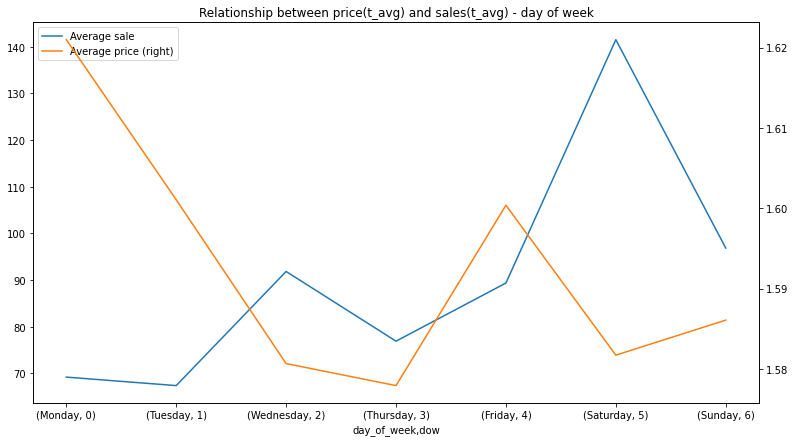

In [19]:
df["sale"].plot(label="Average sale",  title = "Relationship between price(t_avg) and sales(t_avg) - day of week", legend=True, figsize=(13,7))
df["price"].plot(label="Average price", legend=True, secondary_y=True)
## df.plot(figsize=(12,8),secondary_y=True)
plt.show()

## Berdasarkan grafik dua mingguan di atas, kita dapat menemukan ada hubungan terbalik antara penjualan dan harga

In [20]:
retail

,date,sale,stock,price,dow,day_of_week,weeknum
0,2014-01-01,0,4972,1.29,2,Wednesday,00
1,2014-01-02,70,4902,1.29,3,Thursday,00
2,2014-01-03,59,4843,1.29,4,Friday,00
3,2014-01-04,93,4750,1.29,5,Saturday,00
4,2014-01-05,96,4654,1.29,6,Sunday,00
...,...,...,...,...,...,...,...
932,2016-07-27,98,3179,2.39,2,Wednesday,30
933,2016-07-28,108,3071,2.39,3,Thursday,30
934,2016-07-29,128,4095,2.39,4,Friday,30
935,2016-07-30,270,3825,2.39,5,Saturday,30


In [21]:
retail['year'] = retail['date'].dt.year

In [22]:
retail.head()

,date,sale,stock,price,dow,day_of_week,weeknum,year
0,2014-01-01,0,4972,1.29,2,Wednesday,00,2014
1,2014-01-02,70,4902,1.29,3,Thursday,00,2014
2,2014-01-03,59,4843,1.29,4,Friday,00,2014
3,2014-01-04,93,4750,1.29,5,Saturday,00,2014
4,2014-01-05,96,4654,1.29,6,Sunday,00,2014


In [23]:
retail_dow2 = retail.groupby(['year','weeknum']).mean()

In [24]:
retail_dow2

sale        stock     price       dow
year weeknum                                             
2014 00        63.600000  4824.200000  1.290000  4.000000
     01       166.714286  4685.857143  1.175714  3.000000
     02       124.666667  4694.500000  1.140000  2.833333
     03       119.714286  3842.714286  1.118571  3.000000
     04       214.285714  2688.857143  1.018571  3.000000
...                  ...          ...       ...       ...
2016 26       176.714286  1782.857143  2.390000  3.000000
     27       141.428571  1808.142857  2.390000  3.000000
     28       204.428571  1469.428571  1.961429  3.000000
     29       146.000000  1250.857143  2.175714  3.000000
     30       135.142857  3151.857143  2.390000  3.000000

[137 rows x 4 columns]

In [25]:
df2 = retail_dow2.drop(['stock','dow'], axis=1)

In [26]:
df2

sale     price
year weeknum                      
2014 00        63.600000  1.290000
     01       166.714286  1.175714
     02       124.666667  1.140000
     03       119.714286  1.118571
     04       214.285714  1.018571
...                  ...       ...
2016 26       176.714286  2.390000
     27       141.428571  2.390000
     28       204.428571  1.961429
     29       146.000000  2.175714
     30       135.142857  2.390000

[137 rows x 2 columns]

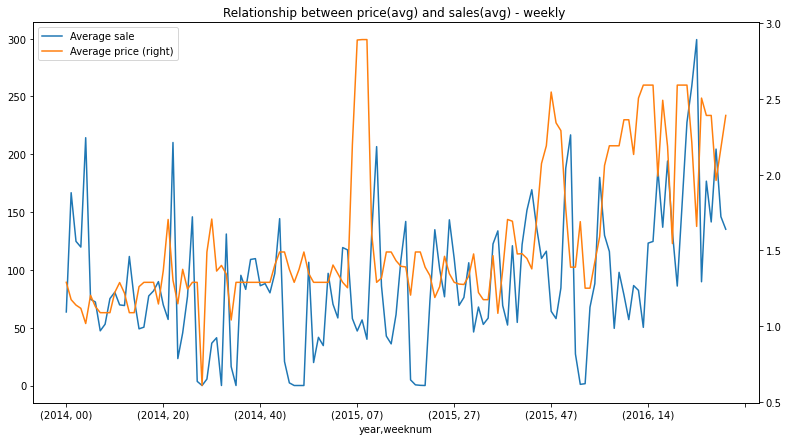

In [27]:
df2["sale"].plot(label="Average sale",  title = "Relationship between price(avg) and sales(avg) - weekly ", legend=True, figsize=(13,7))
df2["price"].plot(label="Average price", legend=True, secondary_y=True)
## df.plot(figsize=(12,8),secondary_y=True)
plt.show()

<blank>

<blank>

<blank>

# 3. Moving Average

In [28]:
retail['7-day'] = retail['price'].rolling(7).mean()
retail['14-day'] = retail['price'].rolling(14).mean()
retail['21-day'] = retail['price'].rolling(21).mean()

In [29]:
retail

,date,sale,stock,price,dow,day_of_week,weeknum,year,7-day,14-day,21-day
0,2014-01-01,0,4972,1.29,2,Wednesday,00,2014,NaN,NaN,NaN
1,2014-01-02,70,4902,1.29,3,Thursday,00,2014,NaN,NaN,NaN
2,2014-01-03,59,4843,1.29,4,Friday,00,2014,NaN,NaN,NaN
3,2014-01-04,93,4750,1.29,5,Saturday,00,2014,NaN,NaN,NaN
4,2014-01-05,96,4654,1.29,6,Sunday,00,2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
932,2016-07-27,98,3179,2.39,2,Wednesday,30,2016,2.39,2.140000,2.175714
933,2016-07-28,108,3071,2.39,3,Thursday,30,2016,2.39,2.175714,2.175714
934,2016-07-29,128,4095,2.39,4,Friday,30,2016,2.39,2.211429,2.175714
935,2016-07-30,270,3825,2.39,5,Saturday,30,2016,2.39,2.247143,2.175714


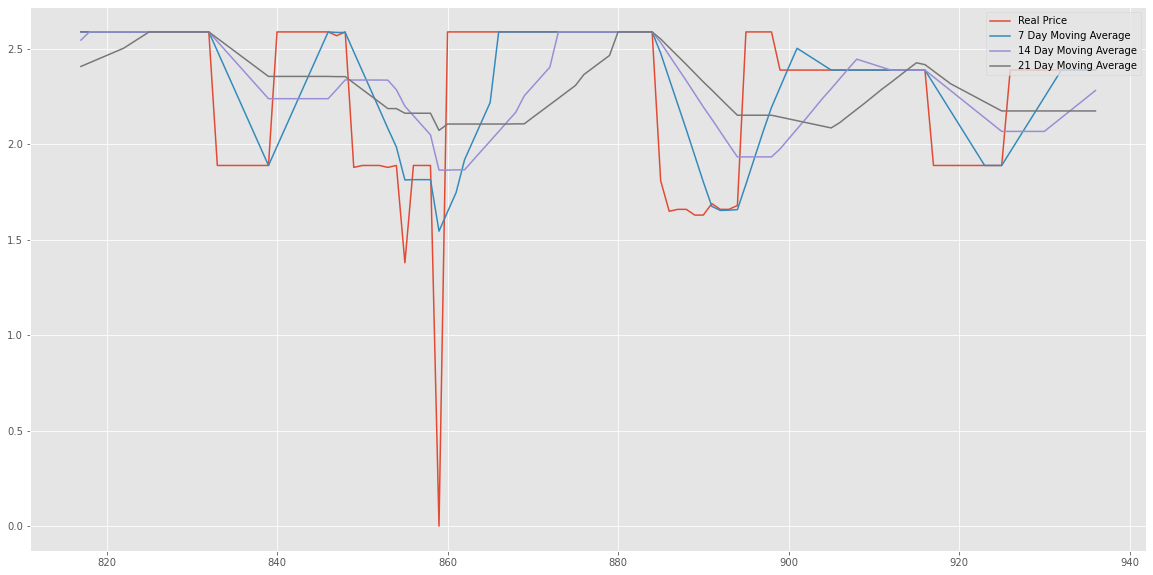

In [30]:
with plt.style.context('ggplot'):
    plt.figure(figsize = (20,10))
    plt.plot(retail.price[-120:], label = 'Real Price')
    plt.plot(retail['7-day'][-120:], label = '7 Day Moving Average')
    plt.plot(retail['14-day'][-120:], label = '14 Day Moving Average')
    plt.plot(retail['21-day'][-120:], label = '21 Day Moving Average')
    plt.legend(loc =1)

In [31]:
retail['7-day'] = retail['sale'].rolling(7).mean()
retail['14-day'] = retail['sale'].rolling(14).mean()
retail['21-day'] = retail['sale'].rolling(21).mean()

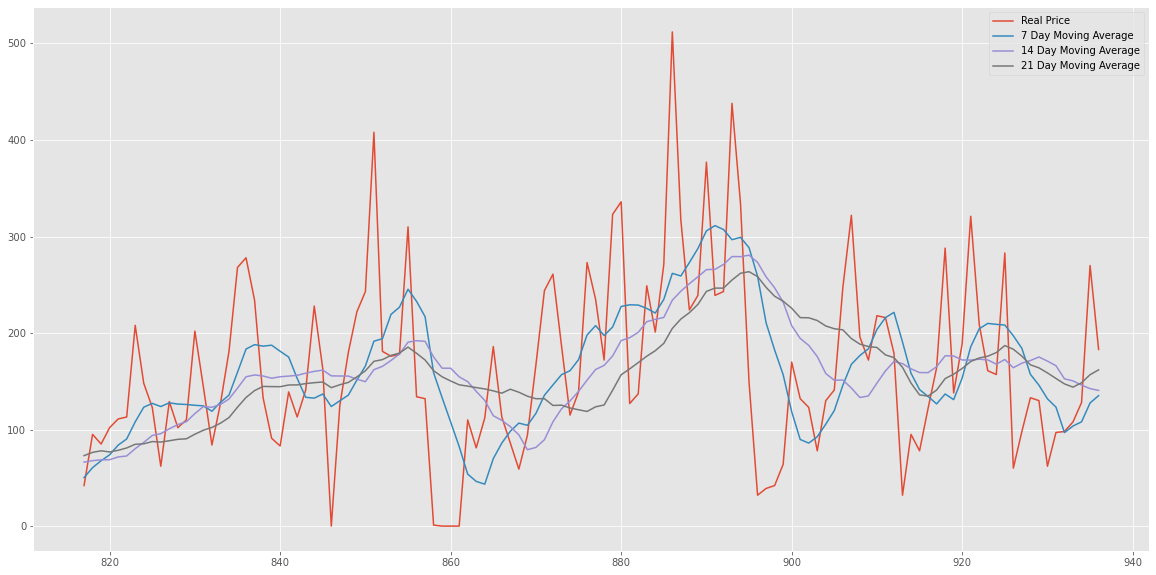

In [32]:
with plt.style.context('ggplot'):
    plt.figure(figsize = (20,10))
    plt.plot(retail.sale[-120:], label = 'Real Price')
    plt.plot(retail['7-day'][-120:], label = '7 Day Moving Average')
    plt.plot(retail['14-day'][-120:], label = '14 Day Moving Average')
    plt.plot(retail['21-day'][-120:], label = '21 Day Moving Average')
    plt.legend(loc =1)

In [33]:
retail.head(20)

,date,sale,stock,price,dow,day_of_week,weeknum,year,7-day,14-day,21-day
0,2014-01-01,0,4972,1.29,2,Wednesday,00,2014,NaN,NaN,NaN
1,2014-01-02,70,4902,1.29,3,Thursday,00,2014,NaN,NaN,NaN
2,2014-01-03,59,4843,1.29,4,Friday,00,2014,NaN,NaN,NaN
3,2014-01-04,93,4750,1.29,5,Saturday,00,2014,NaN,NaN,NaN
4,2014-01-05,96,4654,1.29,6,Sunday,00,2014,NaN,NaN,NaN
5,2014-01-06,145,4509,1.29,0,Monday,01,2014,NaN,NaN,NaN
6,2014-01-07,179,4329,1.29,1,Tuesday,01,2014,91.714286,NaN,NaN
7,2014-01-08,321,4104,1.29,2,Wednesday,01,2014,137.571429,NaN,NaN
8,2014-01-09,125,4459,1.09,3,Thursday,01,2014,145.428571,NaN,NaN
9,2014-01-10,88,5043,1.09,4,Friday,01,2014,149.571429,NaN,NaN


## Dicky Fuller Test

#### Check for stationarity using the Dicky Fuller Test for all three datasets


In [34]:
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(retail['price'])
print(result1)

(-4.585437174184159, 0.00013739285676424176, 2, 934, {'1%': -3.4373707314972766, '5%': -2.8646394422797337, '10%': -2.5684203292233905}, -90.17618431524147)


<blank>

<blank>

<blank>

# 4.1 Simple Exponential Smoothing 

In [35]:
def simple_exp_smooth(d,extra_periods,alpha):  


  d = np.array(d)  # Transform the input into a numpy array  

  cols = len(d)  # Historical period length  

  d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  



  f = np.full(cols+extra_periods,np.nan)  # Forecast array  

  f[0] = d[0]  # initialization of first forecast  

    

  # Create all the t+1 forecasts until end of historical period  

  for t in range(1,cols+1):  

    f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]  
    f[cols+1:] = f[t]  # Forecast for all extra periods  


  df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Error":f-d}) 
  return df

# 4.2 Double Exponential Smoothing

In [36]:
# Double Exponential Smoothing
def double_exp_smooth(d,extra_periods,alpha,beta):  

    d = np.array(d)  # Transform the input into a numpy array  
    cols = len(d)  # Historical period length  
    d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  
# Creation of the level, trend, and forecast arrays
    f= np.full(cols+extra_periods,np.nan)  # Forecast array  
    a = np.full(cols+extra_periods,np.nan)
    b = np.full(cols+extra_periods,np.nan)
# Level and trend initialization 
    a[0] = d[0]
    b[0] = d[1] -d[0]

    
  # Create all the t+1 forecasts until end of historical period  

    for t in range(1,cols):  
        f[t] = a[t-1]+ b[t-1]
        a[t] = alpha*d[t] + (1-alpha)*(a[t-1] + b[t-1])
        b[t] = beta*(a[t] - a[t-1]) + (1-beta)* b[t-1]

# Forecast for all extra periods  
    for t in range(cols, cols+extra_periods):
        f[t] = a[t-1] + b[t-1]
        a[t] = f[t]
        b[t] = b[t-1]


    df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Level": a, "Trend": b, "Error":f-d}) 
    return df

In [37]:
df1=simple_exp_smooth(retail['sale'],7,1)
df1.head(10)

,Demand,Forecast,Error
0,0.0,0.0,0.0
1,70.0,0.0,-70.0
2,59.0,70.0,11.0
3,93.0,59.0,-34.0
4,96.0,93.0,-3.0
5,145.0,96.0,-49.0
6,179.0,145.0,-34.0
7,321.0,179.0,-142.0
8,125.0,321.0,196.0
9,88.0,125.0,37.0


In [38]:
# For KPI Calculation
MAE = df1["Error"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df1["Error"]**2).mean())
print("RMSE:",round(RMSE,2))

MAE: 45.01
RMSE: 67.76


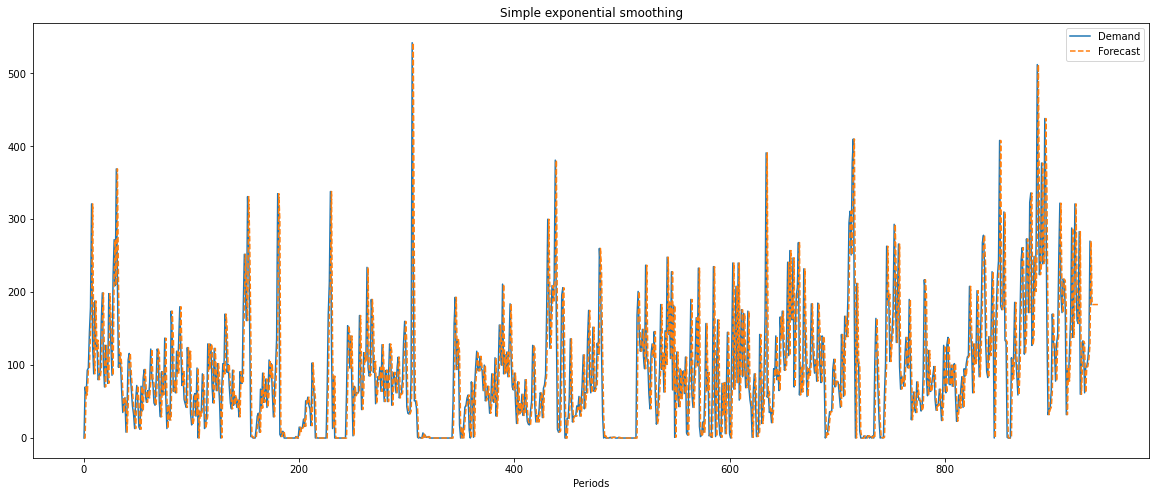

In [39]:
#For Plotting
df1.index.name = "Periods"
df1[["Demand","Forecast"]].plot(figsize=(20,8),title="Simple exponential smoothing",style=["-","--"])  
plt.show()


In [40]:
df11=double_exp_smooth(retail['sale'],7,1,0.05)
df11.tail(10)

,Demand,Forecast,Level,Trend,Error
934,128.0,105.467245,128.000000,-1.406117,-22.532755
935,270.0,126.593883,270.000000,5.764189,-143.406117
936,183.0,275.764189,183.000000,1.125980,92.764189
937,NaN,184.125980,184.125980,1.125980,NaN
938,NaN,185.251959,185.251959,1.125980,NaN
939,NaN,186.377939,186.377939,1.125980,NaN
940,NaN,187.503918,187.503918,1.125980,NaN
941,NaN,188.629898,188.629898,1.125980,NaN
942,NaN,189.755877,189.755877,1.125980,NaN
943,NaN,190.881857,190.881857,1.125980,NaN


In [41]:
MAE = df11["Error"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df11["Error"]**2).mean())
print("RMSE:",round(RMSE,2))

MAE: 46.76
RMSE: 69.77


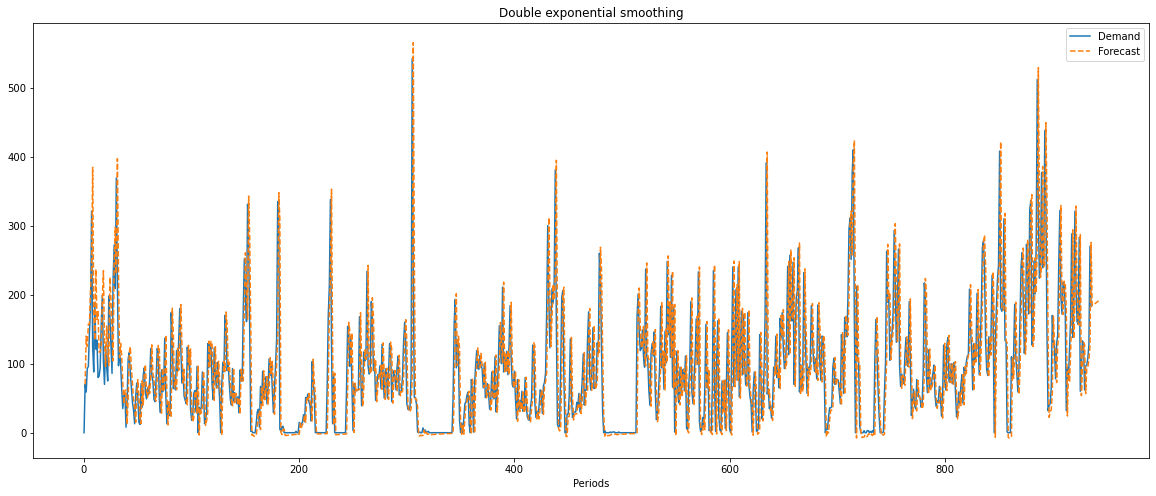

In [42]:
#For Plotting
df11.index.name = "Periods"
df11[["Demand","Forecast"]].plot(figsize=(20,8),title="Double exponential smoothing",style=["-","--"])  
plt.show()

<blank>

<blank>
<blank>
<blank>

# 5. Machine Learning

In [43]:
retail

,date,sale,stock,price,dow,day_of_week,weeknum,year,7-day,14-day,21-day
0,2014-01-01,0,4972,1.29,2,Wednesday,00,2014,NaN,NaN,NaN
1,2014-01-02,70,4902,1.29,3,Thursday,00,2014,NaN,NaN,NaN
2,2014-01-03,59,4843,1.29,4,Friday,00,2014,NaN,NaN,NaN
3,2014-01-04,93,4750,1.29,5,Saturday,00,2014,NaN,NaN,NaN
4,2014-01-05,96,4654,1.29,6,Sunday,00,2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
932,2016-07-27,98,3179,2.39,2,Wednesday,30,2016,96.857143,152.571429,147.333333
933,2016-07-28,108,3071,2.39,3,Thursday,30,2016,103.714286,150.428571,143.952381
934,2016-07-29,128,4095,2.39,4,Friday,30,2016,108.000000,146.071429,148.523810
935,2016-07-30,270,3825,2.39,5,Saturday,30,2016,127.571429,142.428571,156.857143


Predict based on weekly average

In [44]:
retail["year_week"] = retail["year"].map(str) + '-' + retail["weeknum"].map(str)

In [45]:
retail

,date,sale,stock,price,dow,day_of_week,weeknum,year,7-day,14-day,21-day,year_week
0,2014-01-01,0,4972,1.29,2,Wednesday,00,2014,NaN,NaN,NaN,2014-00
1,2014-01-02,70,4902,1.29,3,Thursday,00,2014,NaN,NaN,NaN,2014-00
2,2014-01-03,59,4843,1.29,4,Friday,00,2014,NaN,NaN,NaN,2014-00
3,2014-01-04,93,4750,1.29,5,Saturday,00,2014,NaN,NaN,NaN,2014-00
4,2014-01-05,96,4654,1.29,6,Sunday,00,2014,NaN,NaN,NaN,2014-00
...,...,...,...,...,...,...,...,...,...,...,...,...
932,2016-07-27,98,3179,2.39,2,Wednesday,30,2016,96.857143,152.571429,147.333333,2016-30
933,2016-07-28,108,3071,2.39,3,Thursday,30,2016,103.714286,150.428571,143.952381,2016-30
934,2016-07-29,128,4095,2.39,4,Friday,30,2016,108.000000,146.071429,148.523810,2016-30
935,2016-07-30,270,3825,2.39,5,Saturday,30,2016,127.571429,142.428571,156.857143,2016-30


In [46]:
retail_ml = retail.groupby(["year_week"]).mean()

In [47]:
retail_ml

,sale,stock,price,dow,year,7-day,14-day,21-day
year_week,,,,,,,,
2014-00,63.600000,4824.200000,1.290000,4.000000,2014.0,NaN,NaN,NaN
2014-01,166.714286,4685.857143,1.175714,3.000000,2014.0,142.357143,NaN,NaN
2014-02,124.666667,4694.500000,1.140000,2.833333,2014.0,132.023810,131.442857,NaN
2014-03,119.714286,3842.714286,1.118571,3.000000,2014.0,119.612245,128.295918,127.828571
2014-04,214.285714,2688.857143,1.018571,3.000000,2014.0,164.918367,142.265306,140.503401
...,...,...,...,...,...,...,...,...
2016-26,176.714286,1782.857143,2.390000,3.000000,2016.0,127.714286,157.102041,203.823129
2016-27,141.428571,1808.142857,2.390000,3.000000,2016.0,187.897959,157.806122,167.367347
2016-28,204.428571,1469.428571,1.961429,3.000000,2016.0,153.183673,170.540816,156.265306


In [48]:
retail_ml = retail_ml.drop(['stock','year','7-day','14-day','21-day','dow','price'], axis=1)

In [49]:
retail_ml.sort_values("year_week", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 


In [50]:
retail_ml

,sale
year_week,
2014-00,63.600000
2014-01,166.714286
2014-02,124.666667
2014-03,119.714286
2014-04,214.285714
...,...
2016-26,176.714286
2016-27,141.428571
2016-28,204.428571


In [51]:
retail_lstm = retail_ml

In [52]:
df_ml = pd.DataFrame(retail_ml)

In [53]:
df_ml

,sale
year_week,
2014-00,63.600000
2014-01,166.714286
2014-02,124.666667
2014-03,119.714286
2014-04,214.285714
...,...
2016-26,176.714286
2016-27,141.428571
2016-28,204.428571


In [54]:
df_ml = df_ml.sort_values(by = ['year_week'], ascending = [True])
retail_ml = retail_ml.sort_values(by = ['year_week'], ascending = [True])

In [55]:
# Create 53 weeks of lag values to predict current observation
# Shift of 53 weeks in this case
for i in range(53,0,-1):
    df_ml[['t-'+str(i)]] = retail_ml.shift(i)
print(df_ml)

                 sale        t-53        t-52        t-51        t-50  \
year_week                                                               
2014-00     63.600000         NaN         NaN         NaN         NaN   
2014-01    166.714286         NaN         NaN         NaN         NaN   
2014-02    124.666667         NaN         NaN         NaN         NaN   
2014-03    119.714286         NaN         NaN         NaN         NaN   
2014-04    214.285714         NaN         NaN         NaN         NaN   
...               ...         ...         ...         ...         ...   
2016-26    176.714286  143.285714  109.714286   69.285714   76.142857   
2016-27    141.428571  109.714286   69.285714   76.142857  106.142857   
2016-28    204.428571   69.285714   76.142857  106.142857   46.285714   
2016-29    146.000000   76.142857  106.142857   46.285714   67.857143   
2016-30    135.142857  106.142857   46.285714   67.857143   52.857143   

                 t-49        t-48        t-47     

In [56]:
df_ml

,sale,t-53,t-52,t-51,t-50,t-49,t-48,t-47,t-46,t-45,...,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
year_week,,,,,,,,,,,,,,,,,,,,,
2014-00,63.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01,166.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.600000
2014-02,124.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.600000,166.714286
2014-03,119.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.600000,166.714286,124.666667
2014-04,214.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.600000,166.714286,124.666667,119.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-26,176.714286,143.285714,109.714286,69.285714,76.142857,106.142857,46.285714,67.857143,52.857143,58.285714,...,186.428571,136.857143,194.142857,133.000000,86.000000,156.857143,227.571429,259.142857,299.142857,89.714286
2016-27,141.428571,109.714286,69.285714,76.142857,106.142857,46.285714,67.857143,52.857143,58.285714,122.428571,...,136.857143,194.142857,133.000000,86.000000,156.857143,227.571429,259.142857,299.142857,89.714286,176.714286
2016-28,204.428571,69.285714,76.142857,106.142857,46.285714,67.857143,52.857143,58.285714,122.428571,133.714286,...,194.142857,133.000000,86.000000,156.857143,227.571429,259.142857,299.142857,89.714286,176.714286,141.428571


In [57]:
retail.describe()

,sale,stock,price,dow,year,7-day,14-day,21-day
count,937.000000,937.000000,937.000000,937.000000,937.000000,931.000000,924.000000,917.000000
mean,90.533618,1608.258271,1.592572,3.012807,2014.844184,90.383766,90.069728,89.631874
std,80.682089,1356.691877,0.529502,1.997821,0.766033,58.217363,49.885543,44.837099
min,0.000000,0.000000,0.000000,0.000000,2014.000000,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000,1.000000,2014.000000,53.642857,61.142857,62.238095
50%,76.000000,1348.000000,1.390000,3.000000,2015.000000,82.428571,82.642857,82.523810
75%,127.000000,1964.000000,1.890000,5.000000,2015.000000,121.857143,117.910714,111.666667
max,542.000000,7228.000000,2.980000,6.000000,2016.000000,311.285714,280.714286,263.571429


In [58]:
retail.to_csv('output.csv')

In [59]:
df_ml = df_ml.drop(['sale'], axis=1)

In [60]:
df_ml

,t-53,t-52,t-51,t-50,t-49,t-48,t-47,t-46,t-45,t-44,...,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
year_week,,,,,,,,,,,,,,,,,,,,,
2014-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.600000
2014-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.600000,166.714286
2014-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.600000,166.714286,124.666667
2014-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.600000,166.714286,124.666667,119.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-26,143.285714,109.714286,69.285714,76.142857,106.142857,46.285714,67.857143,52.857143,58.285714,122.428571,...,186.428571,136.857143,194.142857,133.000000,86.000000,156.857143,227.571429,259.142857,299.142857,89.714286
2016-27,109.714286,69.285714,76.142857,106.142857,46.285714,67.857143,52.857143,58.285714,122.428571,133.714286,...,136.857143,194.142857,133.000000,86.000000,156.857143,227.571429,259.142857,299.142857,89.714286,176.714286
2016-28,69.285714,76.142857,106.142857,46.285714,67.857143,52.857143,58.285714,122.428571,133.714286,69.142857,...,194.142857,133.000000,86.000000,156.857143,227.571429,259.142857,299.142857,89.714286,176.714286,141.428571


In [61]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
df_ml2 = df_ml[53:]
print(df_ml2)

                 t-53        t-52        t-51        t-50        t-49  \
year_week                                                               
2015-00     63.600000  166.714286  124.666667  119.714286  214.285714   
2015-01    166.714286  124.666667  119.714286  214.285714   74.571429   
2015-02    124.666667  119.714286  214.285714   74.571429   72.200000   
2015-03    119.714286  214.285714   74.571429   72.200000   47.285714   
2015-04    214.285714   74.571429   72.200000   47.285714   53.000000   
...               ...         ...         ...         ...         ...   
2016-26    143.285714  109.714286   69.285714   76.142857  106.142857   
2016-27    109.714286   69.285714   76.142857  106.142857   46.285714   
2016-28     69.285714   76.142857  106.142857   46.285714   67.857143   
2016-29     76.142857  106.142857   46.285714   67.857143   52.857143   
2016-30    106.142857   46.285714   67.857143   52.857143   58.285714   

                 t-48        t-47        t-46     

In [62]:
df_ml2.values

array([[ 63.6       , 166.71428571, 124.66666667, ..., 106.57142857,
         19.85714286,  41.66666667],
       [166.71428571, 124.66666667, 119.71428571, ...,  19.85714286,
         41.66666667,  34.5       ],
       [124.66666667, 119.71428571, 214.28571429, ...,  41.66666667,
         34.5       ,  97.        ],
       ...,
       [ 69.28571429,  76.14285714, 106.14285714, ...,  89.71428571,
        176.71428571, 141.42857143],
       [ 76.14285714, 106.14285714,  46.28571429, ..., 176.71428571,
        141.42857143, 204.42857143],
       [106.14285714,  46.28571429,  67.85714286, ..., 141.42857143,
        204.42857143, 146.        ]])

In [63]:
# Split Data into dependent(target) and independent(features) variables

retail_ml = df_ml2.values
# Lagged variables (features) and original time series data (target)
X2 = retail_ml[:,0:]  # slice all rows and start with column 0 and go up to but not including the last column
y2 = retail_ml[:,0:]  # slice all rows and last column, essentially separating out 't' column

In [64]:
# Columns t-1 to t-12, which are the lagged variables
X2.shape

(84, 53)

In [65]:
# Column t, which is the original time series
# Give first 10 values of target variable, time series
y2.shape

(84, 53)

In [66]:
X2

array([[ 63.6       , 166.71428571, 124.66666667, ..., 106.57142857,
         19.85714286,  41.66666667],
       [166.71428571, 124.66666667, 119.71428571, ...,  19.85714286,
         41.66666667,  34.5       ],
       [124.66666667, 119.71428571, 214.28571429, ...,  41.66666667,
         34.5       ,  97.        ],
       ...,
       [ 69.28571429,  76.14285714, 106.14285714, ...,  89.71428571,
        176.71428571, 141.42857143],
       [ 76.14285714, 106.14285714,  46.28571429, ..., 176.71428571,
        141.42857143, 204.42857143],
       [106.14285714,  46.28571429,  67.85714286, ..., 141.42857143,
        204.42857143, 146.        ]])

# We are using 80-20 and 70-30 split.

In [67]:
# Target(Y) Train-Test split

Y2 = y2
traintarget_size = int(len(Y2) * 0.80)   # Set split
print(traintarget_size)
train_target, test_target = Y2[:traintarget_size], Y2[traintarget_size:len(Y2)]

print('Observations for Target: %d' % (len(Y2)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

67
Observations for Target: 84
Training Observations for Target: 67
Testing Observations for Target: 17


In [68]:
Y2[traintarget_size:len(Y2)]

array([[3.60000000e+01, 6.12857143e+01, 1.08285714e+02, 1.41857143e+02,
        4.85714286e+00, 5.71428571e-01, 1.42857143e-01, 0.00000000e+00,
        7.37142857e+01, 1.34714286e+02, 1.00714286e+02, 7.67142857e+01,
        1.43285714e+02, 1.09714286e+02, 6.92857143e+01, 7.61428571e+01,
        1.06142857e+02, 4.62857143e+01, 6.78571429e+01, 5.28571429e+01,
        5.82857143e+01, 1.22428571e+02, 1.33714286e+02, 6.91428571e+01,
        5.22857143e+01, 1.20857143e+02, 5.45714286e+01, 1.21857143e+02,
        1.51571429e+02, 1.69285714e+02, 1.36428571e+02, 1.09857143e+02,
        1.16142857e+02, 6.41428571e+01, 5.78571429e+01, 8.42857143e+01,
        1.87857143e+02, 2.16714286e+02, 2.72500000e+01, 1.00000000e+00,
        1.57142857e+00, 6.77142857e+01, 8.81428571e+01, 1.80000000e+02,
        1.29857143e+02, 1.15857143e+02, 4.94285714e+01, 9.78571429e+01,
        7.84285714e+01, 5.70000000e+01, 8.64285714e+01, 8.22857143e+01,
        5.02857143e+01],
       [6.12857143e+01, 1.08285714e+02,

In [69]:
# Features(X) Train-Test split

trainfeature_size = int(len(X2) * 0.80)
train_feature, test_feature = X2[:trainfeature_size], X2[trainfeature_size:len(X2)]
print('Observations for feature: %d' % (len(X2)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 84
Training Observations for feature: 67
Testing Observations for feature: 17


In [70]:
train_feature

array([[ 63.6       , 166.71428571, 124.66666667, ..., 106.57142857,
         19.85714286,  41.66666667],
       [166.71428571, 124.66666667, 119.71428571, ...,  19.85714286,
         41.66666667,  34.5       ],
       [124.66666667, 119.71428571, 214.28571429, ...,  41.66666667,
         34.5       ,  97.        ],
       ...,
       [206.57142857,  86.14285714,  42.71428571, ...,  97.85714286,
         78.42857143,  57.        ],
       [ 86.14285714,  42.71428571,  36.        , ...,  78.42857143,
         57.        ,  86.42857143],
       [ 42.71428571,  36.        ,  61.28571429, ...,  57.        ,
         86.42857143,  82.28571429]])

## Benchmark Model

## Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
  
reg = LinearRegression() # Create a linear regression object
  
reg = reg.fit(train_feature, train_target) # Fit it to the training data
  
# Create two predictions for the training and test sets
train_prediction = reg.predict(train_feature)
test_prediction = reg.predict(test_feature)

In [72]:
train_prediction

array([[ 63.6       , 166.71428571, 124.66666667, ..., 106.57142857,
         19.85714286,  41.66666667],
       [166.71428571, 124.66666667, 119.71428571, ...,  19.85714286,
         41.66666667,  34.5       ],
       [124.66666667, 119.71428571, 214.28571429, ...,  41.66666667,
         34.5       ,  97.        ],
       ...,
       [206.57142857,  86.14285714,  42.71428571, ...,  97.85714286,
         78.42857143,  57.        ],
       [ 86.14285714,  42.71428571,  36.        , ...,  78.42857143,
         57.        ,  86.42857143],
       [ 42.71428571,  36.        ,  61.28571429, ...,  57.        ,
         86.42857143,  82.28571429]])

In [73]:
test_prediction

array([[ 3.60000000e+01,  6.12857143e+01,  1.08285714e+02,
         1.41857143e+02,  4.85714286e+00,  5.71428571e-01,
         1.42857143e-01, -6.77382640e-14,  7.37142857e+01,
         1.34714286e+02,  1.00714286e+02,  7.67142857e+01,
         1.43285714e+02,  1.09714286e+02,  6.92857143e+01,
         7.61428571e+01,  1.06142857e+02,  4.62857143e+01,
         6.78571429e+01,  5.28571429e+01,  5.82857143e+01,
         1.22428571e+02,  1.33714286e+02,  6.91428571e+01,
         5.22857143e+01,  1.20857143e+02,  5.45714286e+01,
         1.21857143e+02,  1.51571429e+02,  1.69285714e+02,
         1.36428571e+02,  1.09857143e+02,  1.16142857e+02,
         6.41428571e+01,  5.78571429e+01,  8.42857143e+01,
         1.87857143e+02,  2.16714286e+02,  2.72500000e+01,
         1.00000000e+00,  1.57142857e+00,  6.77142857e+01,
         8.81428571e+01,  1.80000000e+02,  1.29857143e+02,
         1.15857143e+02,  4.94285714e+01,  9.78571429e+01,
         7.84285714e+01,  5.70000000e+01,  8.64285714e+0

In [74]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,3))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,3))



Tree on train set MAE%: 0.0
Tree on test set MAE%: 0.0


## Decision Tree Model

In [75]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_retail = DecisionTreeRegressor()  # max_depth not set

# Fit the model to the training features and targets
decision_tree_retail.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_retail.score(train_feature, train_target))
print(decision_tree_retail.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


1.0
-1.1313133429481195


In [76]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3,4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_retail = DecisionTreeRegressor(max_depth=d)
    decision_tree_retail.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_retail.score(train_feature, train_target))
    print(decision_tree_retail.score(test_feature, test_target), '\n')  # You want the test score to be positive
    
# R-square for train and test scores are below. 
;

max_depth= 2
0.11953713408903521
-0.45121761808292155 

max_depth= 3
0.22956974420739645
-0.5341303212866179 

max_depth= 4
0.382923826724207
-0.7173259192365853 

max_depth= 5
0.5795305476798662
-0.8282466268840535 

max_depth= 7
0.9177704005234847
-1.28512364314618 

max_depth= 8
0.9882075686748959
-1.1004351706228883 

max_depth= 10
1.0
-1.2598234569871916 



''

### max_depth = 10 

Tree on train set MAE%: 29.9
Tree on test set MAE%: 53.3


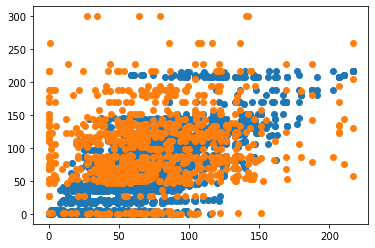

In [77]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_retail = DecisionTreeRegressor(max_depth=5) # Fill in best max depth score here
decision_tree_retail.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_retail.predict(train_feature)

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))


test_prediction = decision_tree_retail.predict(test_feature)

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

# Scatter the predictions vs actual values, orange is predicted
plt.scatter(train_prediction, train_target, label='train')  # blue 
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()


<blank>

<blank>

## Random Forest Model

In [78]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print(rfr.score(train_feature, train_target))
print(rfr.score(test_feature, test_target))  # Try to attain a positive value

0.8793743914624316
-0.2264905015666614


In [79]:
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, but also takes longer it will take to compute. 
# Run grid search
#grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [13]}
grid = {'n_estimators': [200], 'max_depth': [10], 'max_features': [3], 'random_state': [13]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  

# The best test score

-0.22286829184930373 {'random_state': 13, 'n_estimators': 200, 'max_features': 3, 'max_depth': 10}


### We use max_depth : 10

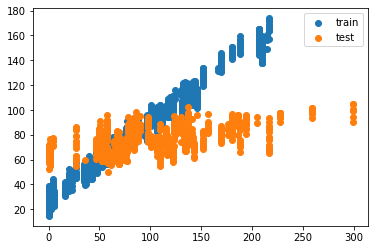

In [80]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=8, max_features = 3, random_state=13)
rfr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr.predict(train_feature)
test_prediction = rfr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

In [81]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))



Tree on train set MAE%: 21.0
Tree on test set MAE%: 42.4


In [82]:
# Random Forest Feature Importance
# get column names
df_ml.columns

Index(['t-53', 't-52', 't-51', 't-50', 't-49', 't-48', 't-47', 't-46', 't-45',
       't-44', 't-43', 't-42', 't-41', 't-40', 't-39', 't-38', 't-37', 't-36',
       't-35', 't-34', 't-33', 't-32', 't-31', 't-30', 't-29', 't-28', 't-27',
       't-26', 't-25', 't-24', 't-23', 't-22', 't-21', 't-20', 't-19', 't-18',
       't-17', 't-16', 't-15', 't-14', 't-13', 't-12', 't-11', 't-10', 't-9',
       't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1'],
      dtype='object')

In [83]:
df_ml

,t-53,t-52,t-51,t-50,t-49,t-48,t-47,t-46,t-45,t-44,...,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
year_week,,,,,,,,,,,,,,,,,,,,,
2014-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.600000
2014-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.600000,166.714286
2014-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.600000,166.714286,124.666667
2014-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.600000,166.714286,124.666667,119.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-26,143.285714,109.714286,69.285714,76.142857,106.142857,46.285714,67.857143,52.857143,58.285714,122.428571,...,186.428571,136.857143,194.142857,133.000000,86.000000,156.857143,227.571429,259.142857,299.142857,89.714286
2016-27,109.714286,69.285714,76.142857,106.142857,46.285714,67.857143,52.857143,58.285714,122.428571,133.714286,...,136.857143,194.142857,133.000000,86.000000,156.857143,227.571429,259.142857,299.142857,89.714286,176.714286
2016-28,69.285714,76.142857,106.142857,46.285714,67.857143,52.857143,58.285714,122.428571,133.714286,69.142857,...,194.142857,133.000000,86.000000,156.857143,227.571429,259.142857,299.142857,89.714286,176.714286,141.428571


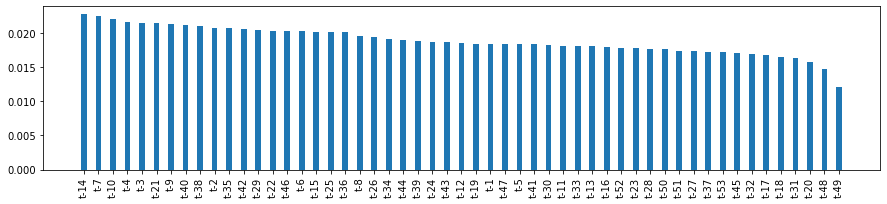

In [84]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
feature_names = ['t-53','t-52','t-51','t-50','t-49','t-48','t-47','t-46','t-45','t-44','t-43','t-42','t-41','t-40','t-39','t-38','t-37','t-36','t-35','t-34','t-33','t-32','t-31','t-30','t-29','t-28','t-27','t-26','t-25','t-24','t-23','t-22','t-21','t-20','t-19','t-18','t-17','t-16','t-15','t-14','t-13','t-12','t-11','t-10','t-9','t-8','t-7','t-6','t-5','t-4','t-3','t-2','t-1']
labels = np.array(feature_names)[sorted_index]
plt.figure(figsize=(15, 3))
plt.bar(x, importances[sorted_index], tick_label=labels, width = 0.4)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

In [85]:
importances

array([0.01727945, 0.01781331, 0.01742589, 0.01765226, 0.01204326,
       0.01478104, 0.0184374 , 0.02034304, 0.01702011, 0.0189424 ,
       0.01865659, 0.02054602, 0.01838934, 0.02120557, 0.01878786,
       0.02105856, 0.01728003, 0.02011913, 0.02070657, 0.01906945,
       0.01812521, 0.01692986, 0.01632952, 0.01819789, 0.02049792,
       0.01771353, 0.01734618, 0.01937362, 0.02013594, 0.01875749,
       0.01774981, 0.02036661, 0.02142578, 0.01576544, 0.01846359,
       0.01648831, 0.01672263, 0.01794161, 0.02017859, 0.0227586 ,
       0.01806031, 0.01852215, 0.01817146, 0.02205282, 0.02126418,
       0.01952219, 0.02253987, 0.02032379, 0.01842253, 0.02157656,
       0.02153928, 0.02072329, 0.0184562 ])

<blank>

<blank>

<blank>

<blank>

<blank>

<blank>

<blank>

<blank>

<blank>

<blank>

## 70:30

In [86]:
# Target(Y) Train-Test split

Y3 = y2
traintarget_size = int(len(Y3) * 0.7)   # Set split
print(traintarget_size)
train_target, test_target = Y3[:traintarget_size], Y3[traintarget_size:len(Y2)]

print('Observations for Target: %d' % (len(Y3)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

58
Observations for Target: 84
Training Observations for Target: 58
Testing Observations for Target: 26


In [87]:
# Features(X) Train-Test split

trainfeature_size = int(len(X2) * 0.7)
train_feature, test_feature = X2[:trainfeature_size], X2[trainfeature_size:len(X2)]
print('Observations for feature: %d' % (len(X2)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 84
Training Observations for feature: 58
Testing Observations for feature: 26


## Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
  
reg = LinearRegression() # Create a linear regression object
  
reg = reg.fit(train_feature, train_target) # Fit it to the training data
  
# Create two predictions for the training and test sets
train_prediction = reg.predict(train_feature)
test_prediction = reg.predict(test_feature)

In [89]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,3))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,3))



Tree on train set MAE%: 0.0
Tree on test set MAE%: 0.0


## Decision Tree

In [90]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_avocado = DecisionTreeRegressor()  # max_depth not set

# Fit the model to the training features and targets
decision_tree_avocado.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_avocado.score(train_feature, train_target))
print(decision_tree_avocado.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


1.0
-1.0736200273530092


In [91]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3,4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_avocado = DecisionTreeRegressor(max_depth=d)
    decision_tree_avocado.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_avocado.score(train_feature, train_target))
    print(decision_tree_avocado.score(test_feature, test_target), '\n')  # You want the test score to be positive
    
# R-square for train and test scores are below. 

max_depth= 2
0.13247377504123165
-0.34596253150551703 

max_depth= 3
0.2524754749752927
-0.3680986212108546 

max_depth= 4
0.41196813270667265
-0.5245376442158208 

max_depth= 5
0.6368412836615722
-0.6811818007852448 

max_depth= 7
0.9901275081312321
-1.089587189729116 

max_depth= 8
1.0
-1.1257917176004082 

max_depth= 10
1.0
-1.03393419025003 



Tree on train set MAE%: 27.7
Tree on test set MAE%: 53.6


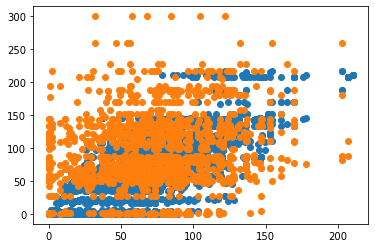

In [92]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_avocado = DecisionTreeRegressor(max_depth=5) # Fill in best max depth score here
decision_tree_avocado.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_avocado.predict(train_feature)

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))


test_prediction = decision_tree_avocado.predict(test_feature)

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

# Scatter the predictions vs actual values, orange is predicted
plt.scatter(train_prediction, train_target, label='train')  # blue 
plt.scatter(test_prediction, test_target, label='test')  
plt.show()

## Random Forrest

In [93]:
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, but also takes longer it will take to compute. 
# Run grid search
#grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [13]}
grid = {'n_estimators': [200], 'max_depth': [8], 'max_features': [3], 'random_state': [13]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  

# The best test score

-0.12821064720710057 {'random_state': 13, 'n_estimators': 200, 'max_features': 3, 'max_depth': 8}


In [94]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))



Tree on train set MAE%: 27.7
Tree on test set MAE%: 53.6


<blank>
    <blank>
        <blank>

# 6. LSTM

In [95]:
import math
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings("ignore")

In [96]:
retail_lstm

,sale
year_week,
2014-00,63.600000
2014-01,166.714286
2014-02,124.666667
2014-03,119.714286
2014-04,214.285714
...,...
2016-26,176.714286
2016-27,141.428571
2016-28,204.428571


In [97]:
retail_lstm['year_week'] = retail_lstm.index

In [98]:
retail_lstm

,sale,year_week
year_week,,
2014-00,63.600000,2014-00
2014-01,166.714286,2014-01
2014-02,124.666667,2014-02
2014-03,119.714286,2014-03
2014-04,214.285714,2014-04
...,...,...
2016-26,176.714286,2016-26
2016-27,141.428571,2016-27
2016-28,204.428571,2016-28


In [99]:
retail_lstm.reset_index(drop=True, inplace=True)

In [100]:
retail_lstm.index = retail_lstm.year_week.str.replace('-', '')

In [101]:
retail_lstm

,sale,year_week
year_week,,
201400,63.600000,2014-00
201401,166.714286,2014-01
201402,124.666667,2014-02
201403,119.714286,2014-03
201404,214.285714,2014-04
...,...,...
201626,176.714286,2016-26
201627,141.428571,2016-27
201628,204.428571,2016-28


In [102]:
retail_lstm.rename(index={'year_week': 'year_weeks'})

,sale,year_week
year_week,,
201400,63.600000,2014-00
201401,166.714286,2014-01
201402,124.666667,2014-02
201403,119.714286,2014-03
201404,214.285714,2014-04
...,...,...
201626,176.714286,2016-26
201627,141.428571,2016-27
201628,204.428571,2016-28


In [103]:
retail_lstm = retail_lstm.drop(['year_week'], axis=1) 
# (['year_week'], inplace=True)

In [104]:
retail_lstm

,sale
year_week,
201400,63.600000
201401,166.714286
201402,124.666667
201403,119.714286
201404,214.285714
...,...
201626,176.714286
201627,141.428571
201628,204.428571


In [105]:
train, test = retail_lstm[:-12],retail_lstm[-12:]

In [106]:
train

,sale
year_week,
201400,63.600000
201401,166.714286
201402,124.666667
201403,119.714286
201404,214.285714
...,...
201614,123.142857
201615,124.571429
201616,186.428571


In [107]:
test

,sale
year_week,
201619,133.000000
201620,86.000000
201621,156.857143
201622,227.571429
201623,259.142857
201624,299.142857
201625,89.714286
201626,176.714286
201627,141.428571


In [108]:
scalar =MinMaxScaler()
scalar.fit(train)
train = scalar.transform(train)
test = scalar.transform(test)

In [109]:
test.shape

(12, 1)

In [110]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, n_input, batch_size =6)

# Epoch Start

# Epoch 50

In [111]:
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(200, activation= 'relu', input_shape =(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
history = model.fit_generator(generator, epochs = 50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0824
Epoch 2/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0660
Epoch 3/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0585
Epoch 4/50
19/19 [==============================] - 1s 26ms/step - loss: 0.0583
Epoch 5/50
19/19 [==============================] - 0s 24ms/step - loss: 0.0605
Epoch 6/50
19/19 [==============================] - 0s 26ms/step - loss: 0.0579
Epoch 7/50
19/19 [==============================] - 0s 23ms/step - loss: 0.0587
Epoch 8/50
19/19 [==============================] - 0s 24ms/step - loss: 0.0575
Epoch 9/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0550
Epoch 10/50
19/19 [==============================] - 1s 28ms/step - loss: 0.0552
Epoch 11/50
19/19 [==============================] - 1s 28ms/step - loss: 0.0536
Epoch 12/50
19/19 [=======================

In [112]:
pred_list =[]
batch = train[-n_input:].reshape(1, n_input, n_features)
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis=1)

pred_list

[array([0.5347289], dtype=float32),
 array([0.44632816], dtype=float32),
 array([0.4266698], dtype=float32),
 array([0.43302175], dtype=float32),
 array([0.4491941], dtype=float32),
 array([0.4586535], dtype=float32),
 array([0.45783648], dtype=float32),
 array([0.46593103], dtype=float32),
 array([0.46525156], dtype=float32),
 array([0.46906337], dtype=float32),
 array([0.4576551], dtype=float32),
 array([0.4578689], dtype=float32)]

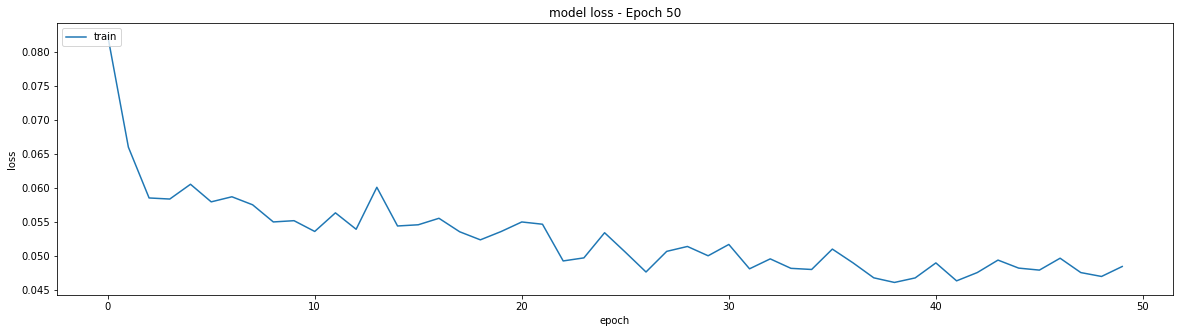

In [113]:
plt.figure(figsize=(20,5))
plt.plot(history.history['loss'])
plt.title('model loss - Epoch 50')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [114]:
df_predict= pd.DataFrame(scalar.inverse_transform(pred_list), index= retail_lstm[-n_input:].index, columns =['Predictions'])

In [115]:
df_test = pd.concat([retail_lstm, df_predict], axis =1)

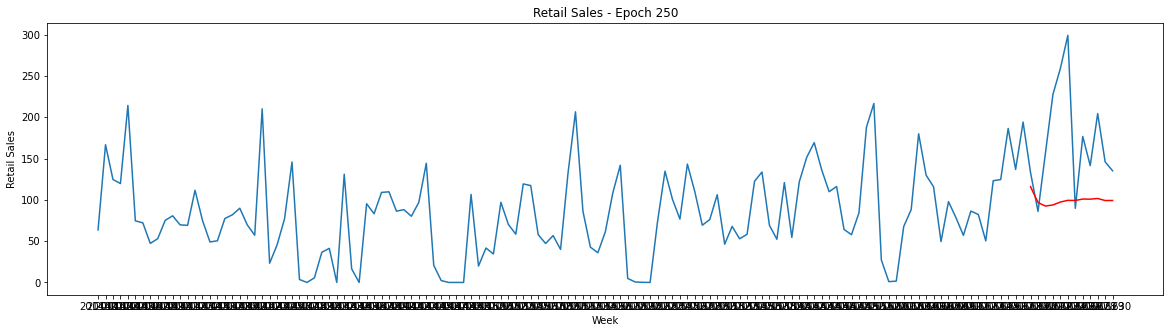

In [116]:
plt.figure(figsize=(20,5))
plt.xlabel("Week")
plt.ylabel("Retail Sales")
plt.title("Retail Sales - Epoch 250")
plt.plot(df_test.index, df_test['sale'])
plt.plot(df_test.index, df_test['Predictions'], color ='r')


## RMSE (Epoch 50)

In [117]:
testScore = math.sqrt(mean_squared_error(df_test.iloc[-12:,0].values, df_test.iloc[-12:,1].values))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 95.76 RMSE


<blank>

<blank>

## Epoch 100

In [118]:
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(200, activation= 'relu', input_shape =(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
history = model.fit_generator(generator, epochs =100)

Epoch 1/100
19/19 [==============================] - 0s 25ms/step - loss: 0.1013
Epoch 2/100
19/19 [==============================] - 0s 24ms/step - loss: 0.0616
Epoch 3/100
19/19 [==============================] - 0s 24ms/step - loss: 0.0582
Epoch 4/100
19/19 [==============================] - 0s 24ms/step - loss: 0.0586
Epoch 5/100
19/19 [==============================] - 0s 24ms/step - loss: 0.0587
Epoch 6/100
19/19 [==============================] - 0s 23ms/step - loss: 0.0577
Epoch 7/100
19/19 [==============================] - 0s 26ms/step - loss: 0.0571
Epoch 8/100
19/19 [==============================] - 0s 25ms/step - loss: 0.0577
Epoch 9/100
19/19 [==============================] - 0s 24ms/step - loss: 0.0561
Epoch 10/100
19/19 [==============================] - 0s 25ms/step - loss: 0.0631
Epoch 11/100
19/19 [==============================] - 1s 27ms/step - loss: 0.0570
Epoch 12/100
19/19 [==============================] - 0s 26ms/step - loss: 0.0582
Epoch 13/100
19/19 [=====

In [119]:
pred_list =[]
batch = train[-n_input:].reshape(1, n_input, n_features)
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis=1)

pred_list

[array([0.4849878], dtype=float32),
 array([0.34449136], dtype=float32),
 array([0.31814528], dtype=float32),
 array([0.37991434], dtype=float32),
 array([0.47426873], dtype=float32),
 array([0.4956883], dtype=float32),
 array([0.46500155], dtype=float32),
 array([0.49467596], dtype=float32),
 array([0.48639408], dtype=float32),
 array([0.4812752], dtype=float32),
 array([0.45707664], dtype=float32),
 array([0.43699118], dtype=float32)]

## Model Loss

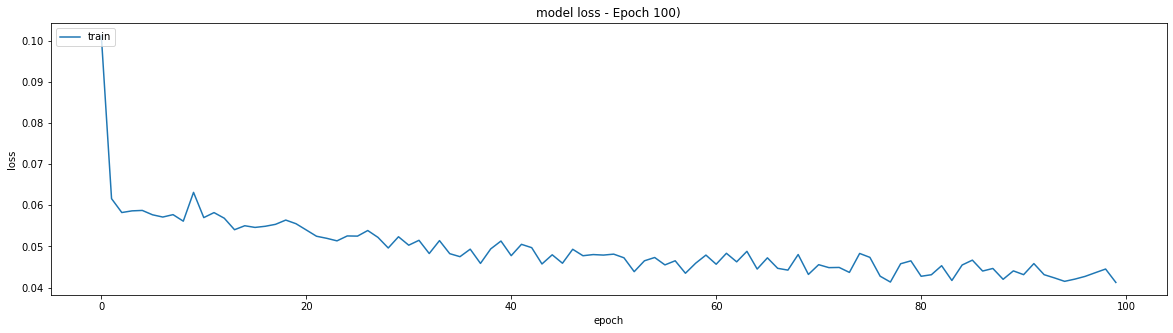

In [120]:
plt.figure(figsize=(20,5))
plt.plot(history.history['loss'])
plt.title('model loss - Epoch 100)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [121]:
df_predict= pd.DataFrame(scalar.inverse_transform(pred_list), index= retail_lstm[-n_input:].index, columns =['Predictions'])

In [122]:
df_test = pd.concat([retail_lstm, df_predict], axis =1)

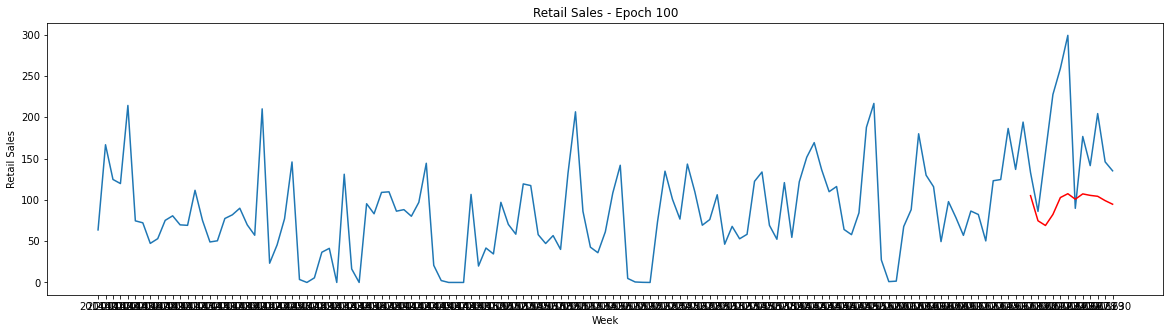

In [123]:
plt.figure(figsize=(20,5))
plt.xlabel("Week")
plt.ylabel("Retail Sales")
plt.title("Retail Sales - Epoch 100")
plt.plot(df_test.index, df_test['sale'])
plt.plot(df_test.index, df_test['Predictions'], color ='r')


In [124]:
df_test.iloc[-12:,1].values

array([105.10378365,  74.65619957,  68.94662605,  82.33286555,
       102.78081002, 107.42273358, 100.77247948, 107.20334822,
       105.40854509, 104.29921138,  99.05503732,  94.70223251])

In [125]:
df_test.iloc[-12:,0].values

array([133.        ,  86.        , 156.85714286, 227.57142857,
       259.14285714, 299.14285714,  89.71428571, 176.71428571,
       141.42857143, 204.42857143, 146.        , 135.14285714])

### RMSE (Epoch 100)

In [126]:
testScore = math.sqrt(mean_squared_error(df_test.iloc[-12:,0].values, df_test.iloc[-12:,1].values))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 96.20 RMSE


## Epoch 150

In [127]:
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(200, activation= 'relu', input_shape =(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
history = model.fit_generator(generator, epochs =150)

Epoch 1/150
19/19 [==============================] - 0s 24ms/step - loss: 0.1043
Epoch 2/150
19/19 [==============================] - 0s 25ms/step - loss: 0.0636
Epoch 3/150
19/19 [==============================] - 0s 25ms/step - loss: 0.0599
Epoch 4/150
19/19 [==============================] - 1s 26ms/step - loss: 0.0592
Epoch 5/150
19/19 [==============================] - 0s 25ms/step - loss: 0.0603
Epoch 6/150
19/19 [==============================] - 0s 26ms/step - loss: 0.0573
Epoch 7/150
19/19 [==============================] - 0s 25ms/step - loss: 0.0617
Epoch 8/150
19/19 [==============================] - 1s 26ms/step - loss: 0.0568
Epoch 9/150
19/19 [==============================] - 1s 26ms/step - loss: 0.0602
Epoch 10/150
19/19 [==============================] - 1s 27ms/step - loss: 0.0583
Epoch 11/150
19/19 [==============================] - 1s 29ms/step - loss: 0.0561
Epoch 12/150
19/19 [==============================] - 1s 29ms/step - loss: 0.0626
Epoch 13/150
19/19 [=====

In [128]:
pred_list =[]
batch = train[-n_input:].reshape(1, n_input, n_features)
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis=1)

pred_list

[array([0.6033054], dtype=float32),
 array([0.41873112], dtype=float32),
 array([0.38024154], dtype=float32),
 array([0.46476683], dtype=float32),
 array([0.61236525], dtype=float32),
 array([0.78521836], dtype=float32),
 array([0.6920333], dtype=float32),
 array([0.8806592], dtype=float32),
 array([0.83173037], dtype=float32),
 array([0.7893938], dtype=float32),
 array([0.4783735], dtype=float32),
 array([0.4347314], dtype=float32)]

## Model Loss - Epoch 150

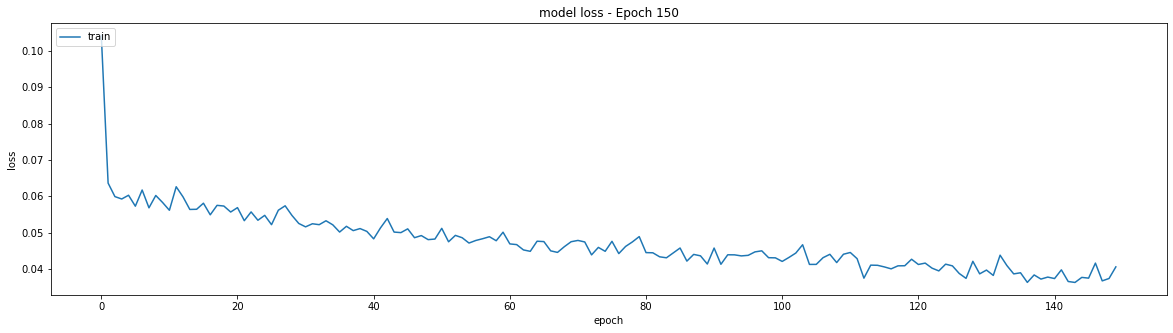

In [129]:
plt.figure(figsize=(20,5))
plt.plot(history.history['loss'])
plt.title('model loss - Epoch 150')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [130]:
df_predict= pd.DataFrame(scalar.inverse_transform(pred_list), index= retail_lstm[-n_input:].index, columns =['Predictions'])

In [131]:
df_test = pd.concat([retail_lstm, df_predict], axis =1)

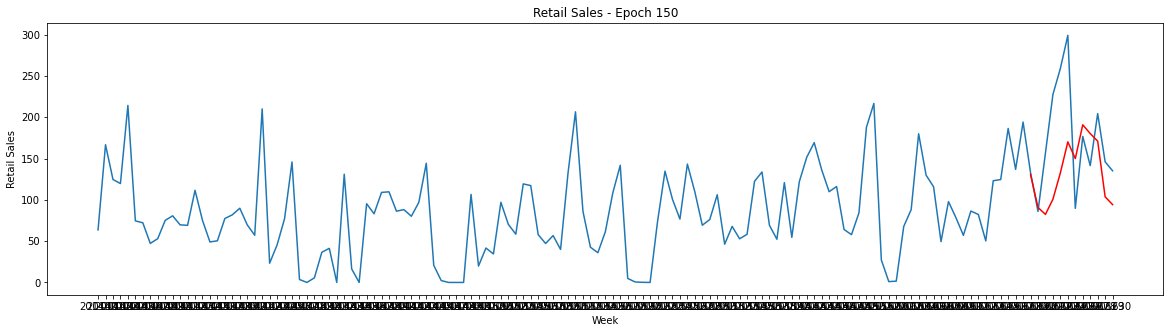

In [132]:
plt.figure(figsize=(20,5))
plt.xlabel("Week")
plt.ylabel("Retail Sales")
plt.title("Retail Sales - Epoch 150")
plt.plot(df_test.index, df_test['sale'])
plt.plot(df_test.index, df_test['Predictions'], color ='r')


### RMSE (Epoch 150)

In [133]:
testScore = math.sqrt(mean_squared_error(df_test.iloc[-12:,0].values, df_test.iloc[-12:,1].values))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 73.14 RMSE


## Epoch 200

In [134]:
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(200, activation= 'relu', input_shape =(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
history=model.fit_generator(generator, epochs =200)

Epoch 1/200
19/19 [==============================] - 1s 28ms/step - loss: 0.1026
Epoch 2/200
19/19 [==============================] - 1s 26ms/step - loss: 0.0618
Epoch 3/200
19/19 [==============================] - 1s 27ms/step - loss: 0.0587
Epoch 4/200
19/19 [==============================] - 1s 27ms/step - loss: 0.0593
Epoch 5/200
19/19 [==============================] - 1s 28ms/step - loss: 0.0590
Epoch 6/200
19/19 [==============================] - 0s 26ms/step - loss: 0.0572
Epoch 7/200
19/19 [==============================] - 0s 26ms/step - loss: 0.0560
Epoch 8/200
19/19 [==============================] - 1s 28ms/step - loss: 0.0617
Epoch 9/200
19/19 [==============================] - 1s 28ms/step - loss: 0.0559
Epoch 10/200
19/19 [==============================] - 1s 27ms/step - loss: 0.0567
Epoch 11/200
19/19 [==============================] - 1s 28ms/step - loss: 0.0565
Epoch 12/200
19/19 [==============================] - 1s 26ms/step - loss: 0.0545
Epoch 13/200
19/19 [=====

In [135]:
pred_list =[]
batch = train[-n_input:].reshape(1, n_input, n_features)
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis=1)

pred_list


[array([0.5724492], dtype=float32),
 array([0.502774], dtype=float32),
 array([0.5845774], dtype=float32),
 array([0.67463714], dtype=float32),
 array([0.8157343], dtype=float32),
 array([0.8545434], dtype=float32),
 array([0.6686794], dtype=float32),
 array([0.6096242], dtype=float32),
 array([0.5547003], dtype=float32),
 array([0.63516533], dtype=float32),
 array([0.68039435], dtype=float32),
 array([0.78491014], dtype=float32)]

## Model Loss - Epoch 200

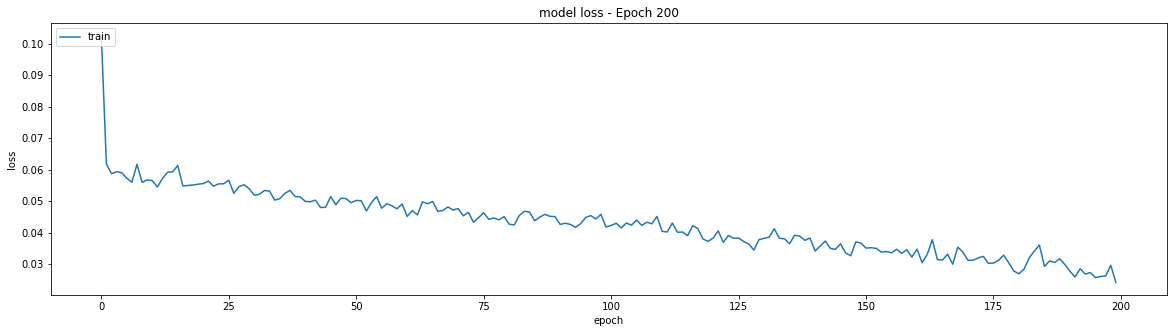

In [136]:
plt.figure(figsize=(20,5))
plt.plot(history.history['loss'])
plt.title('model loss - Epoch 200')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [137]:
df_predict= pd.DataFrame(scalar.inverse_transform(pred_list), index= retail_lstm[-n_input:].index, columns =['Predictions'])

In [138]:
df_test = pd.concat([retail_lstm, df_predict], axis =1)

In [139]:
df_test.count()

sale           137
Predictions     12
dtype: int64

In [140]:
df_predict.count()

Predictions    12
dtype: int64

In [141]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 201400 to 201630
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sale         137 non-null    float64
 1   Predictions  12 non-null     float64
dtypes: float64(2)
memory usage: 3.2+ KB


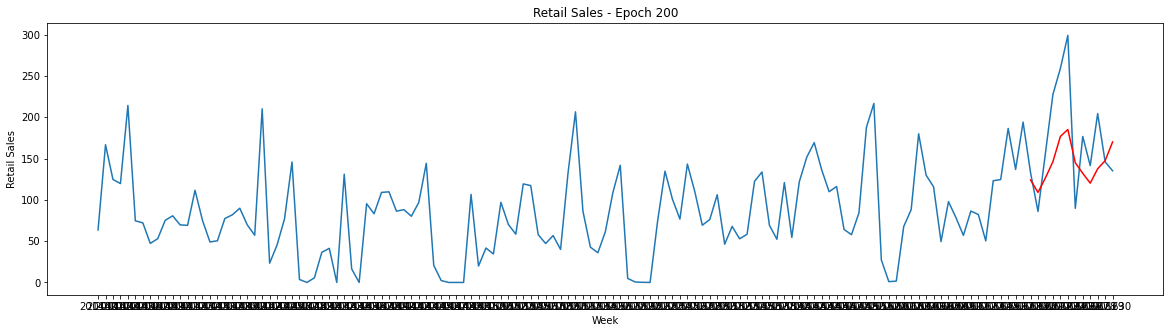

In [142]:
plt.figure(figsize=(20,5))
plt.xlabel("Week")
plt.ylabel("Retail Sales")
plt.title("Retail Sales - Epoch 200")
plt.plot(df_test.index, df_test['sale'])
plt.plot(df_test.index, df_test['Predictions'], color ='r')


### RMSE (Epoch 200)

In [143]:
testScore = math.sqrt(mean_squared_error(df_test.iloc[-12:,0].values, df_test.iloc[-12:,1].values))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 57.06 RMSE


## Epoch 250

In [144]:
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(200, activation= 'relu', input_shape =(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
history = model.fit_generator(generator, epochs =250)

Epoch 1/250
19/19 [==============================] - 1s 26ms/step - loss: 0.0909
Epoch 2/250
19/19 [==============================] - 0s 26ms/step - loss: 0.0609
Epoch 3/250
19/19 [==============================] - 1s 28ms/step - loss: 0.0637
Epoch 4/250
19/19 [==============================] - 1s 27ms/step - loss: 0.0586: 0s - loss: 0.0
Epoch 5/250
19/19 [==============================] - 1s 29ms/step - loss: 0.0593
Epoch 6/250
19/19 [==============================] - 1s 28ms/step - loss: 0.0583
Epoch 7/250
19/19 [==============================] - 1s 30ms/step - loss: 0.0688: 0s - loss: 
Epoch 8/250
19/19 [==============================] - 1s 27ms/step - loss: 0.0607
Epoch 9/250
19/19 [==============================] - 0s 25ms/step - loss: 0.0587
Epoch 10/250
19/19 [==============================] - 0s 25ms/step - loss: 0.0593
Epoch 11/250
19/19 [==============================] - 0s 26ms/step - loss: 0.0572
Epoch 12/250
19/19 [==============================] - 0s 26ms/step - loss: 0.0

In [145]:
pred_list =[]
batch = train[-n_input:].reshape(1, n_input, n_features)
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis=1)

pred_list

[array([0.5898988], dtype=float32),
 array([0.51695734], dtype=float32),
 array([0.5228257], dtype=float32),
 array([0.6729571], dtype=float32),
 array([0.85710377], dtype=float32),
 array([1.0407202], dtype=float32),
 array([0.5450793], dtype=float32),
 array([0.7175088], dtype=float32),
 array([0.61751306], dtype=float32),
 array([0.7340497], dtype=float32),
 array([0.616972], dtype=float32),
 array([0.34796056], dtype=float32)]

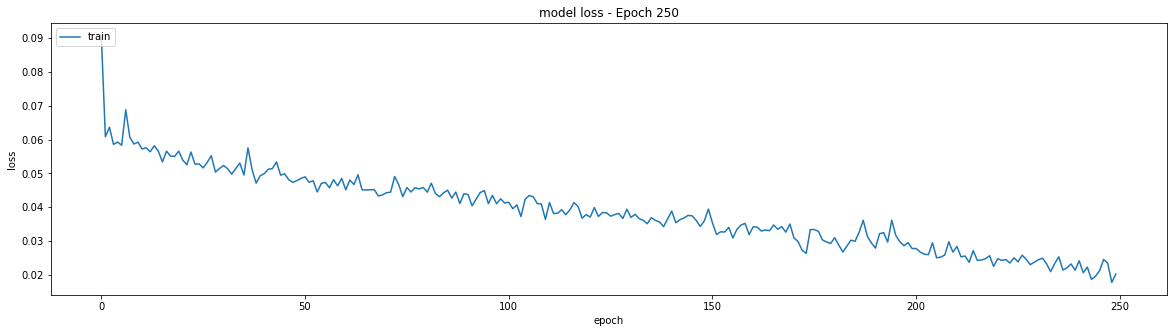

In [146]:
plt.figure(figsize=(20,5))
plt.plot(history.history['loss'])
plt.title('model loss - Epoch 250')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [147]:
df_predict= pd.DataFrame(scalar.inverse_transform(pred_list), index= retail_lstm[-n_input:].index, columns =['Predictions'])

In [148]:
df_test = pd.concat([retail_lstm, df_predict], axis =1)

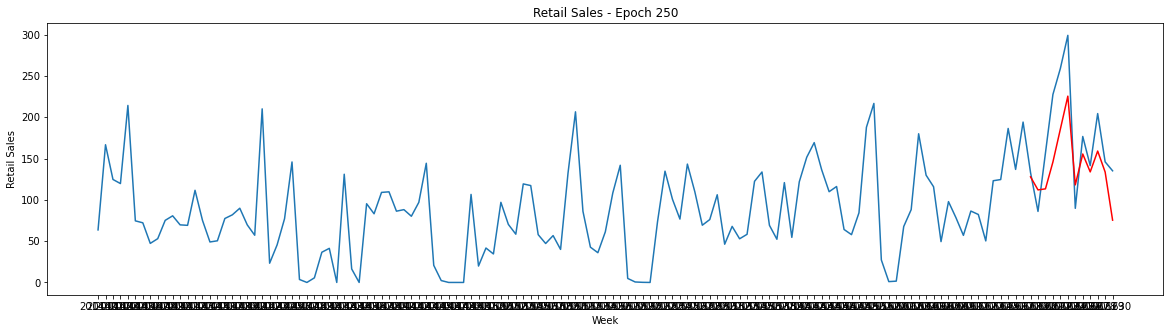

In [149]:
plt.figure(figsize=(20,5))
plt.xlabel("Week")
plt.ylabel("Retail Sales")
plt.title("Retail Sales - Epoch 250")
plt.plot(df_test.index, df_test['sale'])
plt.plot(df_test.index, df_test['Predictions'], color ='r')


### RMSE (Epoch 250)

In [150]:
testScore = math.sqrt(mean_squared_error(df_test.iloc[-12:,0].values, df_test.iloc[-12:,1].values))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 47.59 RMSE


<blank>

<blank>